## Kaggle Competition: Classifying Cyberbullying 

https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

##### - Backgound:
With social media use becoming more prevalent at every age, the ubiquity of social media means cyberbullying can effectively affect anyone, anytime, anywhere.
##### - Target:
In order to prevent the spread of cyberbullying, it may be an effective way to use models to detect whether there is cyberbullying in the message and give timely warnings.
##### - Data set:
This project is about the analysis of tweets about cyberbullying. The dataset contains more than 47000 tweets labelled according to the class of cyberbullying:
- Age
- Ethnicity
- Gender
- Religion
- Other type of cyberbullying
- Not cyberbullying

#### Table of Contents
1. EDA Procedure

2. Model building and training: LSTM, RNN, RandomForest

3. Conclution

In [1]:
#https://www.kaggle.com/code/jhoward/nb-svm-strong-linear-baseline
#https://github.com/MartinaSus/TextAnalytics_UniPi_2021-22
#https://www.kaggle.com/code/vincentgupo/classifying-cyberbullying-94-accuracy

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data
train = pd.read_csv('cyberbullying_tweets.csv')

### 1. EDA Procedure




1.1 Inspect, Visualize and Clean the Data

1.2 Words extraction from text: word_tokenize, stopwords and WordNetLemmatizer by NLTK

1.3 Vectorisation: texts_to_sequences，pad_sequence，Embedding

#### 1.1 Inspect, Visualize and Clean the Data

#Check data type, any None or Duplicates

In [4]:
# Check data type, any None
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
# Check data type, any None
train.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


#Visualizations for the distribution of cyberbullying type

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


<AxesSubplot:>

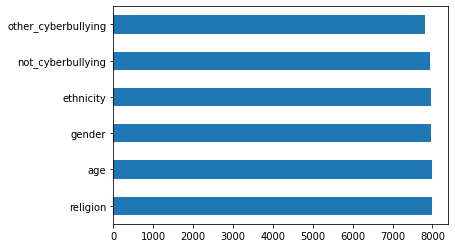

In [6]:
print(train['cyberbullying_type'].value_counts())
train['cyberbullying_type'].value_counts().plot(kind='barh')#.plot.bar()

In [7]:
# Check for duplicates in articles
print('- lenth of training data:',len(train))
print('- Sum of None:')
print(train.isna().sum())
print('- Sum of Duplicates:',len(train[train['tweet_text'].duplicated()]))

- lenth of training data: 47692
- Sum of None:
tweet_text            0
cyberbullying_type    0
dtype: int64
- Sum of Duplicates: 1675


#We found 1675 duplicate articles. So do the data clean,delete the duplicates

In [8]:
# delete the duplicates
train = train.drop_duplicates(subset=['tweet_text'])

#### 1.2 Words extraction from text: word_tokenize, stopwords and WordNetLemmatizer by NLTK


- NLTK: Natural Language Tool Kit, A leading platform for building Python programs to work with human language data.

- word_tokenize: Tokenize and tag text

- Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by stop words.

- WordNetLemmatizer : Lemmatization is to remove the affixes of words and extract the main part of words. For example, the lemmatized word "cars" is "car", and the lemmatized word "ate" is "eat".

In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#Split_Word

step 1: Convert text to lowercase and tokenize it using nltk
 
step 2: remove punctuation items
 
step 3: remove stop words which load form NLTK
 
step 4:Lemmatization

In [10]:
# Removing HTML tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removing stopwords and not alphabet
stops = set(stopwords.words("english"))
def remove_stops(text):
    return ' '.join([word for word in word_tokenize(text.lower()) if((word.isalpha()==1) & (word not in stops))]  )

# Lemmatization
def word_lemmatize(text):
    TextAfterLemmatize = [] 
    lemmatizer = WordNetLemmatizer()
    for word in text.split(' '):
        TextAfterLemmatize.append(lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos='v'), pos='n'))  
    return ' '.join(TextAfterLemmatize) # return string for Scikit learn Vectorization

def clean_text(text):
    text = remove_html(text)
    text = remove_URL(text)
    text = remove_stops(text)
    text = word_lemmatize(text)
    return text

train['tweet_text'] = train['tweet_text'].apply(lambda x : clean_text(x) )

#Visualizations for text length distribution for each tweet message

<AxesSubplot:>

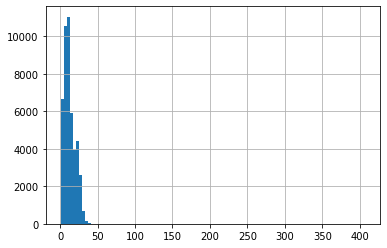

In [11]:
train['Text_len'] = train['tweet_text'].apply(lambda x : len(x.split(' ')))
train['Text_len'].hist(bins=100)

#Visualizations for the mean text length of each article in different cyberbullying type

<AxesSubplot:ylabel='cyberbullying_type'>

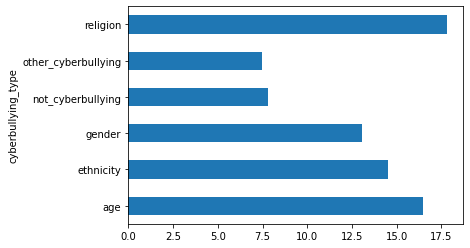

In [12]:
train.groupby(['cyberbullying_type'])['Text_len'].mean().plot.barh()

#Creating word cloud for each Cyberbullying type

In [13]:
from wordcloud import WordCloud

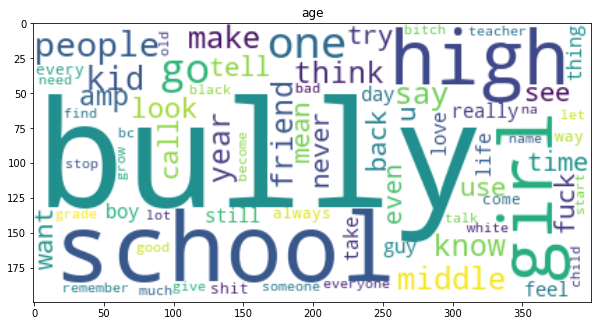

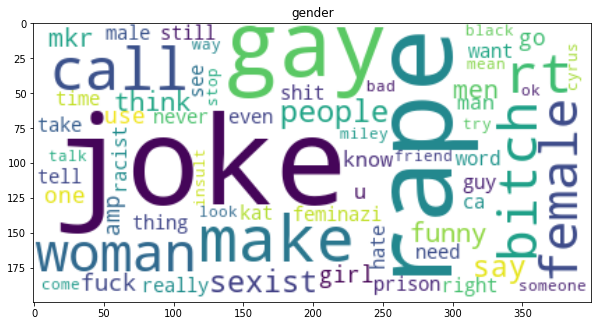

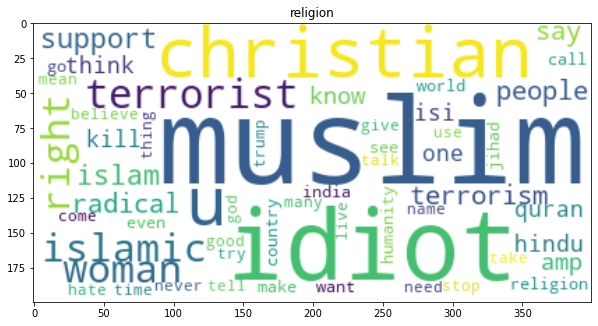

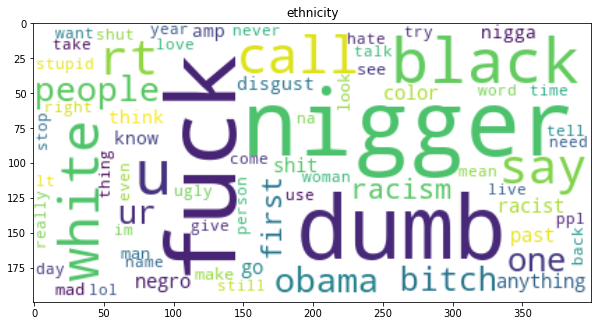

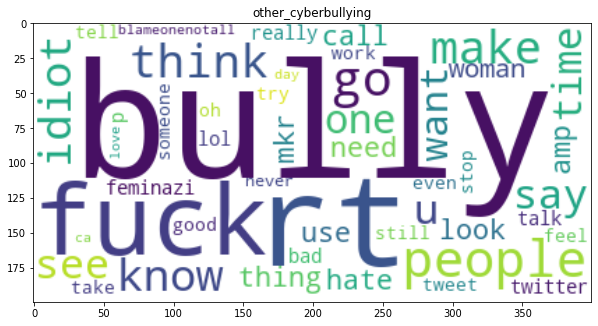

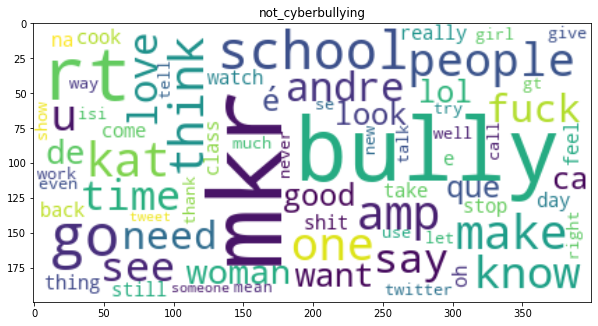

In [14]:
categories = ['age', 'gender', 'religion', 'ethnicity',
              'other_cyberbullying','not_cyberbullying']

for cate in categories:
    temp_df = train[train['cyberbullying_type']==cate]
    string = (temp_df['tweet_text']+' ').sum()
    wordcloud = WordCloud(
            background_color ='white',
            min_font_size = 10,
            collocations=False,
                ).generate(string)

    # 繪圖
    plt.figure(figsize=(10,8))
    plt.title(cate)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(train[['tweet_text']], train['cyberbullying_type'], test_size=0.33, random_state=42)

#### texts_to_sequences

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
# Fitting to the input data
# Find the most common 2000 words from the training data to build a dictionary
num_words = 5000
token = Tokenizer(num_words=num_words, oov_token='OOV')
token.fit_on_texts(x_train['tweet_text'])

x_train_seq = token.texts_to_sequences(x_train["tweet_text"])
x_test_seq = token.texts_to_sequences(x_test["tweet_text"])

In [18]:
pd.DataFrame(x_train_seq).head()

,0,1,2,3,4,5,6,7,8,9,...,397,398,399,400,401,402,403,404,405,406
0,951.0,41.0,342.0,231.0,121.0,67.0,670.0,86.0,2.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,632.0,2659.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1255.0,91.0,333.0,262.0,159.0,4909.0,7.0,966.0,222.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,2253.0,105.0,15.0,69.0,1.0,36.0,24.0,32.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.0,152.0,26.0,37.0,1904.0,52.0,50.0,195.0,464.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### pad_sequence

You will find that the length of each text is different.

So we truncated each text to take 50 words for training (we cannot handle texts of different lengths during training).

Pads zeros in sequence to make the length of sequences equal.

In [19]:
# Pads zeros in sequence to make the length of sequences equal
max_length = 50
x_train_pad = pad_sequences(x_train_seq, maxlen=max_length) #, padding='post'
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length)

In [20]:
pd.DataFrame(x_train_pad).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,8,12,3,37,1,81,1,358,41,171
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,632,2659,2
2,0,0,0,0,0,0,0,0,0,0,...,91,333,262,159,4909,7,966,222,53,3519
3,0,0,0,0,0,0,0,0,0,0,...,116,41,25,43,1,163,189,152,34,194
4,0,0,0,0,0,0,0,0,0,0,...,0,25,152,26,37,1904,52,50,195,464


### LabelEncoder

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.OneHotEncoder()
label_encoder.fit(y_train.to_numpy().reshape(-1, 1))
y_train_le = label_encoder.transform(y_train.to_numpy().reshape(-1, 1))
y_test_le = label_encoder.transform(y_test.to_numpy().reshape(-1, 1))
y_train_le.tocsr().todense()

matrix([[1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [22]:
label_encoder.inverse_transform(y_train_le)

array([['age'],
       ['age'],
       ['gender'],
       ...,
       ['ethnicity'],
       ['not_cyberbullying'],
       ['gender']], dtype=object)


## 2. Model Architecture
In this project, I aim to train and compare the performance of three different models: 
1. LSTM
2. SimpleRNN
3. RandomForest 

to classify cyberbullying text. I will analyze and compare their differences to determine which model is most effective.


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In the training process, EarlyStopping and ReduceLROnPlateau are two commonly used techniques to improve the model's performance. 
- EarlyStopping stops the training process if the validation loss does not improve for a certain number of epochs, preventing overfitting. 
- ReduceLROnPlateau reduces the learning rate when the validation loss does not decrease in the next 2 epochs, allowing the model to fine-tune its parameters and potentially achieve better results.

In [24]:
def model_fit(model):
    # If val_loss does not decrease in next 3 epochs, Model will stop training.
    earlystopper = EarlyStopping(monitor='val_loss',
                                 patience=3,
                                 verbose=0,
                                 restore_best_weights=True)

    # Automatically to adjust the learning rate, When val_loss stop decreasing in next 1 epochs, reduce the learning rate.
    reducel = ReduceLROnPlateau(monitor='val_loss',
                                patience=1,
                                verbose=0,
                                factor=0.3)

    history = model.fit(x_train_pad,
                        y_train_le,
                        verbose=1,
                        batch_size=64,
                        epochs=30,
                        validation_split=0.1,
                        callbacks=[reducel, earlystopper])
    return history,model

#### Embedding
Embedding: Turn the original number into a N-dimensional vector

Use keras package do the Embedding process in the model.

* input_dim: Size of the vocabulary.
* output_dim: Dimension of the dense embedding.
* input_length: Length of input sequences

In [26]:
def build_LSTM_Architecture():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_length))
    model.add(Dropout(0.2))
    model.add(LSTM(16,return_sequences=True))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0002), metrics=['accuracy'])
    model.summary()
    return model_fit(model)

In [27]:
def build_SimpleRNN_Architecture():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_length))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=16))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0002), metrics=['accuracy'])
    model.summary()
    return model_fit(model)

In [28]:
LSTM_history,LSTM_model = build_LSTM_Architecture()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 16)            3136      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                

In [29]:
SimpleRNN_history,SimpleRNN_model = build_SimpleRNN_Architecture()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 166,678
Trainable params: 166,678
Non-trainable params: 0
________________________________________________

# Results and Analysis
1. Set model training callback for early stop, and automatically adjust the learning rate.
2. Observe how the training and validation accuracy changes as the training time increases. We can find that after the learning rate is reduced, the growth of both train and val becomes slow and flat. This avoids overfitting.
3. Observing the performance, LSTM and SimpleRNN outperform the RandomForest
    - LSTM : 81.3%
    - SimpleRNN : 80.3%
    - RandomForest : 59.6%
4. The model may be better at classifying age, gender, religion, and ethnicity because these categories are more distinct and have clear differences in the language used. On the other hand, classifying other_cyberbullying and not_cyberbullying may be more challenging because they are less well-defined and may have more subtle differences in the language used. Additionally, the class imbalance between these two categories may also contribute to the lower classification accuracy.

In [30]:
def print_accuracyloss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc,label='Training accuracy')
    plt.plot(epochs, val_acc,label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.grid(True)
    plt.figure()

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss,label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.grid(True)
    plt.show()

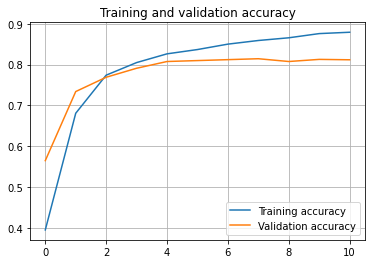

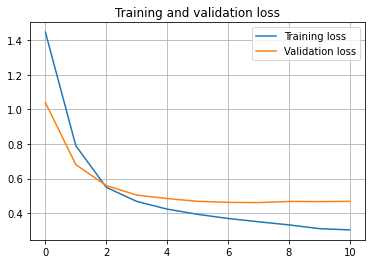

In [31]:
print_accuracyloss(LSTM_history)

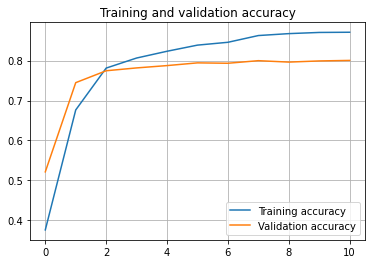

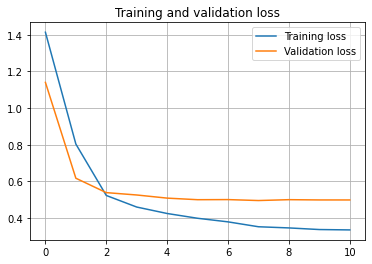

In [32]:
print_accuracyloss(SimpleRNN_history)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
def predict_result(model,x_test,y_test,if_inverse = False):
    y_pred = model.predict(x_test)
    if if_inverse :
        y_pred = label_encoder.inverse_transform(y_pred)
    print("accuracy_score:",accuracy_score(y_pred, y_test)*100)
    categories = categories = ['age', 'gender', 'religion', 'ethnicity','other_cyberbullying','not_cyberbullying']
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=categories),
                columns = categories,
                index = categories)
    return conf_matrix

In [35]:
print('LSTM_model:')
predict_result(LSTM_model,x_test_pad,y_test,if_inverse = True)

LSTM_model:
accuracy_score: 81.31173449229554


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2484,11,17,0,8,96
gender,3,2109,19,7,214,225
religion,3,18,2413,14,41,62
ethnicity,0,4,25,2573,51,6
other_cyberbullying,19,91,12,26,1312,591
not_cyberbullying,77,136,112,7,943,1457


In [36]:
print('SimpleRNN_mode:')
predict_result(SimpleRNN_model,x_test_pad,y_test,if_inverse = True)

SimpleRNN_mode:
accuracy_score: 80.37007770314763


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2498,4,34,35,20,25
gender,1,2143,43,1,101,288
religion,40,48,2359,1,27,76
ethnicity,27,1,3,2551,60,17
other_cyberbullying,17,129,14,46,1072,773
not_cyberbullying,78,173,119,22,758,1582


#### RandomForestClassifier

Here we use GridSearchCV to find the best hyperparameters for RandomForest

GridSearchCV consists of two parts, GridSearch and Cross-Validation

- GridSearch: Exhaustive search over specified parameter values for an estimator.

- Cross-Validation: Train data partitioned into k equally sized folds. Subsequently k iterations of training and validation are performed such that within each iteration a different fold of the data is held-out for validation while the remaining k − 1 folds are used for learning

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
tuned_parameter = [{
                    'min_samples_split': range(2,6,2),
                    'max_depth': range(40,80,10),
                    
                  }]
#設置交叉驗證
clf = GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=tuned_parameter, 
                   cv=3)
clf.fit(x_train_pad,y_train)

print('Best parameters:')
print(clf.best_params_)
print('RandomForestClassifier:')
predict_result(clf,x_test_pad,y_test,if_inverse = False)

Best parameters:
{'max_depth': 70, 'min_samples_split': 4}
RandomForestClassifier:
accuracy_score: 59.66021335440538


,age,gender,religion,ethnicity,other_cyberbullying,not_cyberbullying
age,2350,10,157,23,22,54
gender,146,1233,388,205,200,405
religion,131,252,1664,99,145,260
ethnicity,196,135,576,1639,47,66
other_cyberbullying,65,234,117,75,657,903
not_cyberbullying,143,251,135,69,617,1517


### 3. Conclution
In the task of classifying cyberbullying text, the results show that LSTM and RNN outperform the RandomForest. The LSTM achieved an accuracy of 81.3%, which is slightly higher than the RNN's 80.3%. Both LSTM and RNN are deep learning models that are specifically designed for sequential data processing, and their superior performance can be attributed to their ability to capture the long-term dependencies in the text data.

On the other hand, the RandomForest, which is a traditional machine learning model, achieved an accuracy of only 60%. This could be due to the fact that RandomForest does not take into account the sequential nature of the text data, and therefore cannot effectively capture the complex patterns in the text.

In conclusion, the results suggest that deep learning models such as LSTM and RNN are more suitable for the task of classifying cyberbullying text, and they outperform traditional machine learning models like RandomForest. 

To improve the model's performance, one could consider adding more layers to the LSTM/RNN models, using pre-trained word embeddings, or incorporating additional features such as metadata. Additionally, increasing the size of the dataset or balancing the classes could also improve the model's accuracy.